# Homework 08 LSTM Stock Predictions

# Step 1. Import the data from the given .csv file (Google_Stock_Price_Train.csv (https://sjsu.instructure.com/courses/1585768/files/75906517/download?download_frd=1) ).

In [2]:
import pandas as pd

In [11]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,533.709833,151.904442,279.12,404.115,537.47,654.9225,816.68
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


# Step 2. Preprocess the data as you see fit


In [13]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,5.337098e+02,1.519044e+02,279.12,404.115,537.47,6.549225e+02,816.68
High,1258.0,5.378802e+02,1.530088e+02,281.21,406.765,540.75,6.625875e+02,816.68
Low,1258.0,5.290074e+02,1.505528e+02,277.22,401.765,532.99,6.448000e+02,805.14
Volume,1258.0,3.158107e+06,2.273726e+06,7900.00,1621700.000,2566150.00,4.122500e+06,24977900.00


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 59.1+ KB


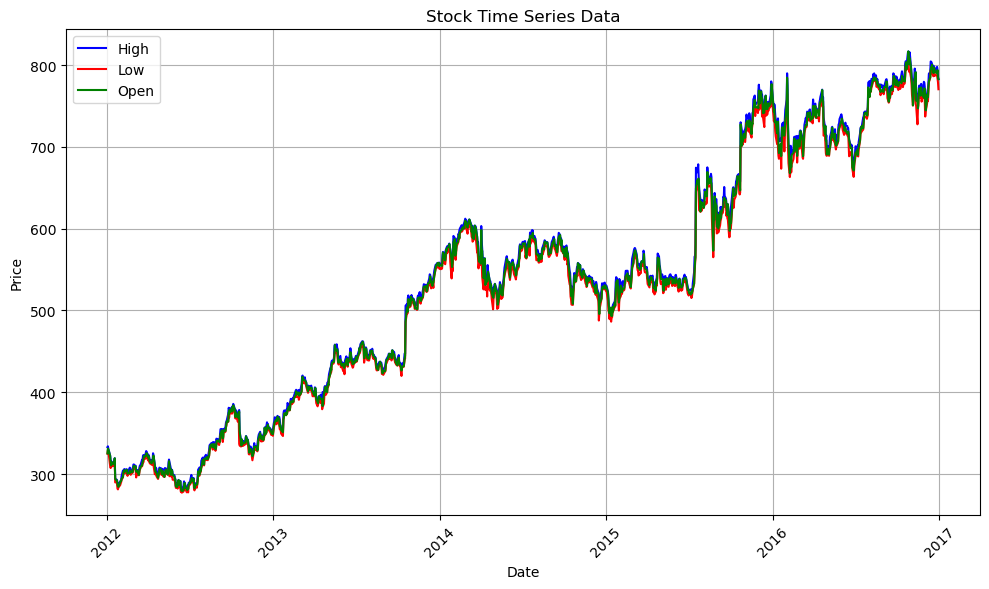

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting High and Low prices
plt.plot(df['Date'], df['High'], label='High', color='blue')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='green')

# Plotting Open and Close prices as markers
# plt.plot(df['Date'], df['Open'], marker='o', linestyle='-', color='green', label='Open')
# plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='orange', label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Time Series Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
given_date = '3/27/2014'
given_date = pd.to_datetime(given_date)
print("filter based on he date = ", given_date)
filtered_df = df[df['Date']>= given_date]
filtered_df.head()

filter based on he date =  2014-03-27 00:00:00


,Date,Open,High,Low,Close,Volume
560,2014-03-27,566.44,566.44,551.41,556.93,13100
561,2014-03-28,559.66,564.88,557.14,558.46,41200
562,2014-03-31,565.34,565.45,555.41,555.45,10800
563,2014-04-01,557.18,566.89,557.18,565.61,7900
564,2014-04-02,598.35,603.17,560.65,565.45,147100


In [58]:
from sklearn.preprocessing import MinMaxScaler

def scale_features(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [59]:
scaled_data = scale_features(filtered_df[['Close']].values)
print(f"Shape of the {scaled_data.shape=}")

Shape of the scaled_data.shape=(698, 1)


In [62]:
import numpy as np

def create_dataset(data, look_back):
    x, y = [], []
    for i in range(look_back, len(data)):
        x.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Step 3. Split into 80% train 20% prediction


In [91]:
import math

def train_test_split(X, test_size=.2, look_back=7):
    N = len(X)
    boundary = math.floor(N * (1 - test_size))
    
    print(f"Total Number of records = {N}, boundary = {boundary}")
    
    X_train, y_train = create_dataset(X[:boundary], look_back)
    X_test, y_test = create_dataset(X[boundary:], look_back)
    
    # X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    # X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    X_train = torch.tensor(X_train).float()
    y_train = torch.tensor(y_train).float()
    X_test = torch.tensor(X_test).float()
    y_test = torch.tensor(y_test).float()
    
    print(f"Training Data Size = {X_train.shape}, {y_train.shape}")
    print(f"Test Data Size     = {X_test.shape}, {y_test.shape}")
    
    return X_train, X_test, y_train, y_test
    

X = filtered_df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(scaled_data, test_size=0.2, look_back=7)


print(X_train[:1])

Total Number of records = 698, boundary = 558
Training Data Size = torch.Size([551, 7]), torch.Size([551])
Test Data Size     = torch.Size([133, 7]), torch.Size([133])
tensor([[0.2042, 0.2089, 0.1996, 0.2312, 0.2307, 0.2391, 0.1567]])


# Step 4. Train the model on the data


In [92]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [93]:
def train(model, X_train, y_train, num_epochs=20):
    # Train the model
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    for epoch in range(num_epochs):
        outputs = model(X_train)
        optimizer.zero_grad()
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    return model


def evaluate(model, X_test, y_test, look_back):
    # Predict on the testing set
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Ensure y_test and predictions have the same length
    print(f"Sizes => {y_test.shape=}, {predictions.shape}")
    min_len = min(len(y_test), len(predictions))
    y_test, predictions = y_test[:min_len], predictions[:min_len]

    # Calculate RMSE for the testing set
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Testing RMSE for look_back = {look_back}: {test_rmse}")
    return test_rmse
    

In [94]:
rmse_dict = {}

for look_back in range(7, 22):
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, test_size=0.2, look_back=look_back)
    
    model = LSTMModel(input_size=look_back)
    model = train(model, X_train, y_train)
    
    rmse_dist[look_back] = evaluate(model, X_test, y_test, look_back)
    
    

    

Total Number of records = 698, boundary = 558
Training Data Size = torch.Size([551, 7]), torch.Size([551])
Test Data Size     = torch.Size([133, 7]), torch.Size([133])


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [73]:
# # Dictionary to store RMSE values for each look_back
# rmse_dict = {}

# # Loop over different look_back values
# for look_back in range(1, 21):  # Example: Checking from 1 to 20 lags
#     # Prepare the training and testing datasets
#     x_train, y_train = create_dataset(scaled_data[:training_data_len], look_back)
#     x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#     x_test, y_test = create_dataset(scaled_data[training_data_len:], look_back)
#     x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 5. Report on the results of your model

In [95]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = data.iloc[:, 1:2].values  # Use 'Open' column for training

# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences and labels for training
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 60  # Number of time steps
X_train, y_train = create_sequences(training_set_scaled, n_steps)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1, num_layers=3):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x.unsqueeze(2))
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the model
model = LSTMModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train.unsqueeze(2))
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
model.eval()
with torch.no_grad():
    test_data = pd.read_csv('Google_Stock_Price_Test.csv')
    real_stock_price = test_data.iloc[:, 1:2].values  # Use 'Open' column for testing
    inputs = sc.transform(real_stock_price)
    inputs = torch.tensor(inputs).float()
    X_test, _ = create_sequences(inputs, n_steps)
    X_test = torch.tensor(X_test).float()
    predicted_stock_price = model(X_test.unsqueeze(2)).squeeze().numpy()
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Plot the results
plt.plot(real_stock_price[n_steps:], color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(real_stock_price[n_steps:], predicted_stock_price


SyntaxError: incomplete input (696090356.py, line 88)